In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import networkx as nx

from multiple_bonds_parsing import create_atom_df, compute_fragments

%config InlineBackend.figure_format = 'retina'

In [2]:
directory = r"\\wsl$\Ubuntu-18.04\home\arlenlex\LIGGGHTS_SEAICE\lexi_tests\floe_testing\floe_generation\post_bonded_floe"
df_atom, df_nbonds = create_atom_df(directory, directory, 1e-5)

In [8]:
fragments_per_timestep, Graphs = compute_fragments(directory)
connected_components = list(nx.connected_components(Graphs[-1]))
component_sizes = np.array([len(component) for component in connected_components])
print(f'The number of connected components is {len(connected_components)} and the sizes of these components are {component_sizes}.')

The number of connected components is 4 and the sizes of these components are [2703    2    2    2].


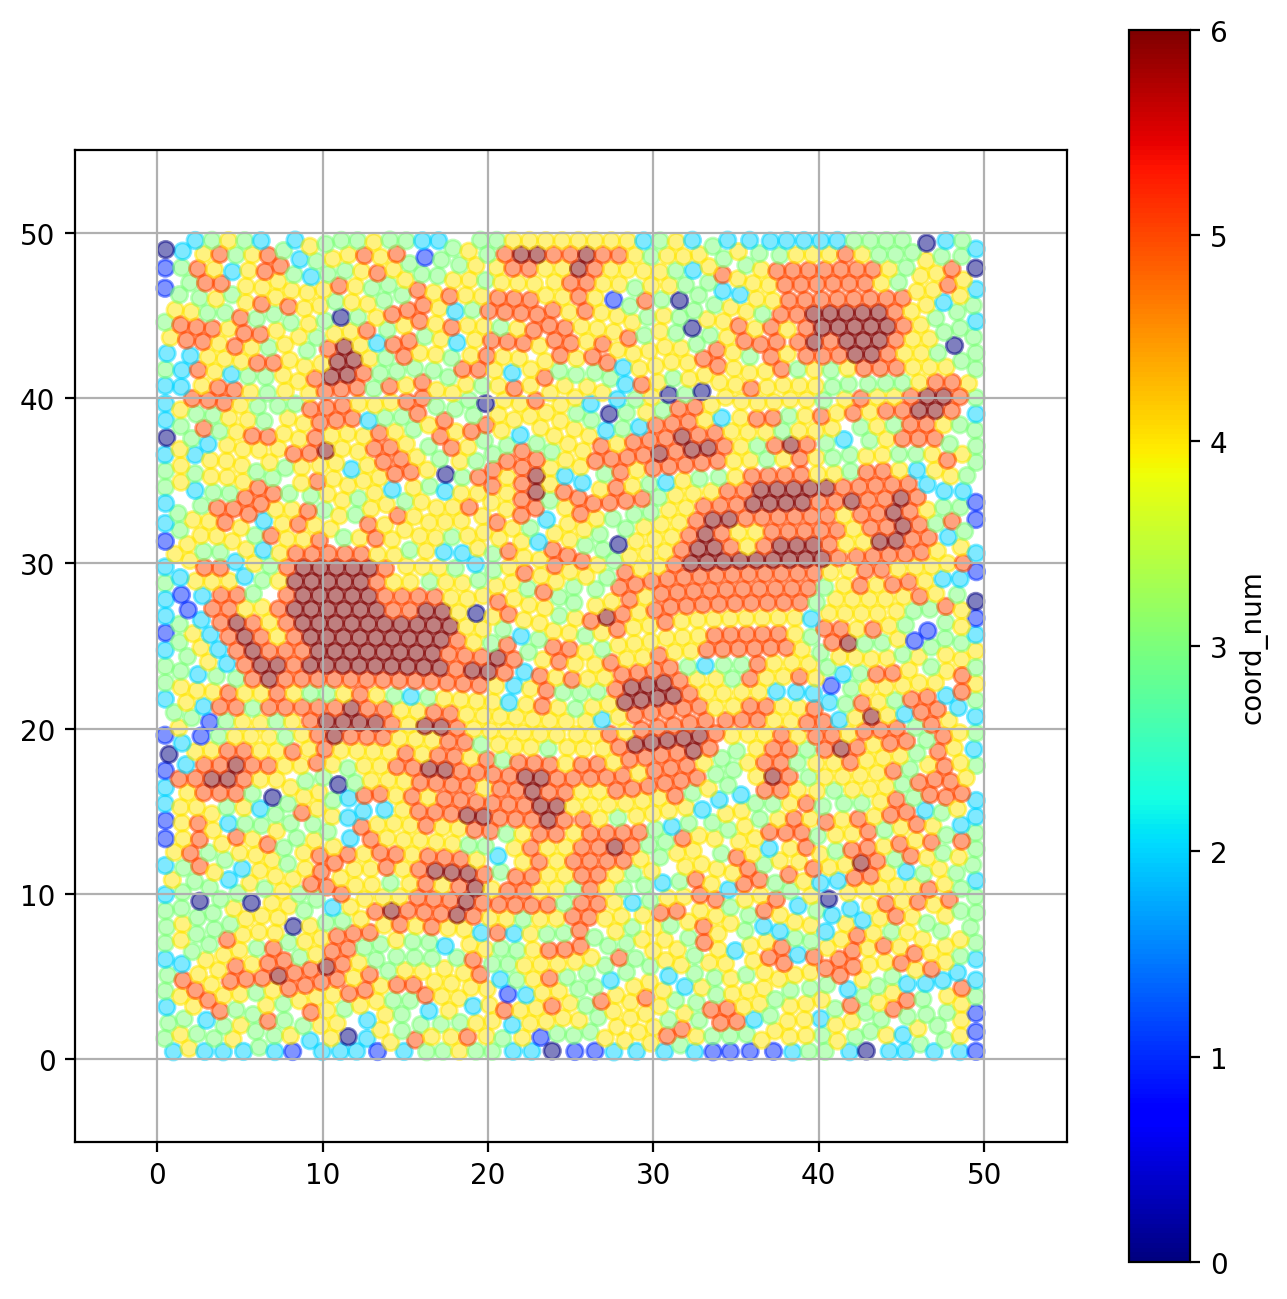

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))

# Dictionary to store circle objects for each atom
circles = {}

# Assuming df_atom has already been defined and structured correctly
unique_atoms = set(idx[0] for idx in df_atom.keys())

var = 'coord_num'

# Function to map coordination number to a color (e.g., more bonds = redder)
def quant_to_color(coord_num, norm, cmap):
    # Normalize the coordination number for color mapping
    normed = norm(coord_num)
    return cmap(normed)

# Get the colormap and normalization for coordination numbers
cmap = cm.jet # You can use other colormaps like 'plasma', 'inferno', etc.
coord_numbers = df_atom.xs('coord_num', axis=1, level=1).values.flatten()
norm = mcolors.Normalize(vmin=coord_numbers.min(), vmax=coord_numbers.max())

# Create colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set array to empty as it's not needed for a ScalarMappable
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label(var)

i=-1
# Initialize circles at their initial positions
for atom_id in unique_atoms:
    initial_x = df_atom[(atom_id, 'x')].iloc[i]
    initial_y = df_atom[(atom_id, 'y')].iloc[i]
    radius = df_atom[(atom_id, 'radius')].iloc[i]
    circle = Circle((initial_x, initial_y), radius, alpha=0.5)
    val = df_atom[(atom_id, var)].iloc[i]
    color = quant_to_color(val, norm, cmap)
    circle.set_color(color)
    ax.add_patch(circle)
    circles[atom_id] = circle

# Set the plot limits manually
ax.set_xlim(-5, 55)
ax.set_ylim(-5, 55)
ax.set_aspect('equal', 'box')
ax.grid()


plt.show()

C:\Users\arlenlex\AppData\Local\Temp\ipykernel_35348\3930845013.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', num_fragments)


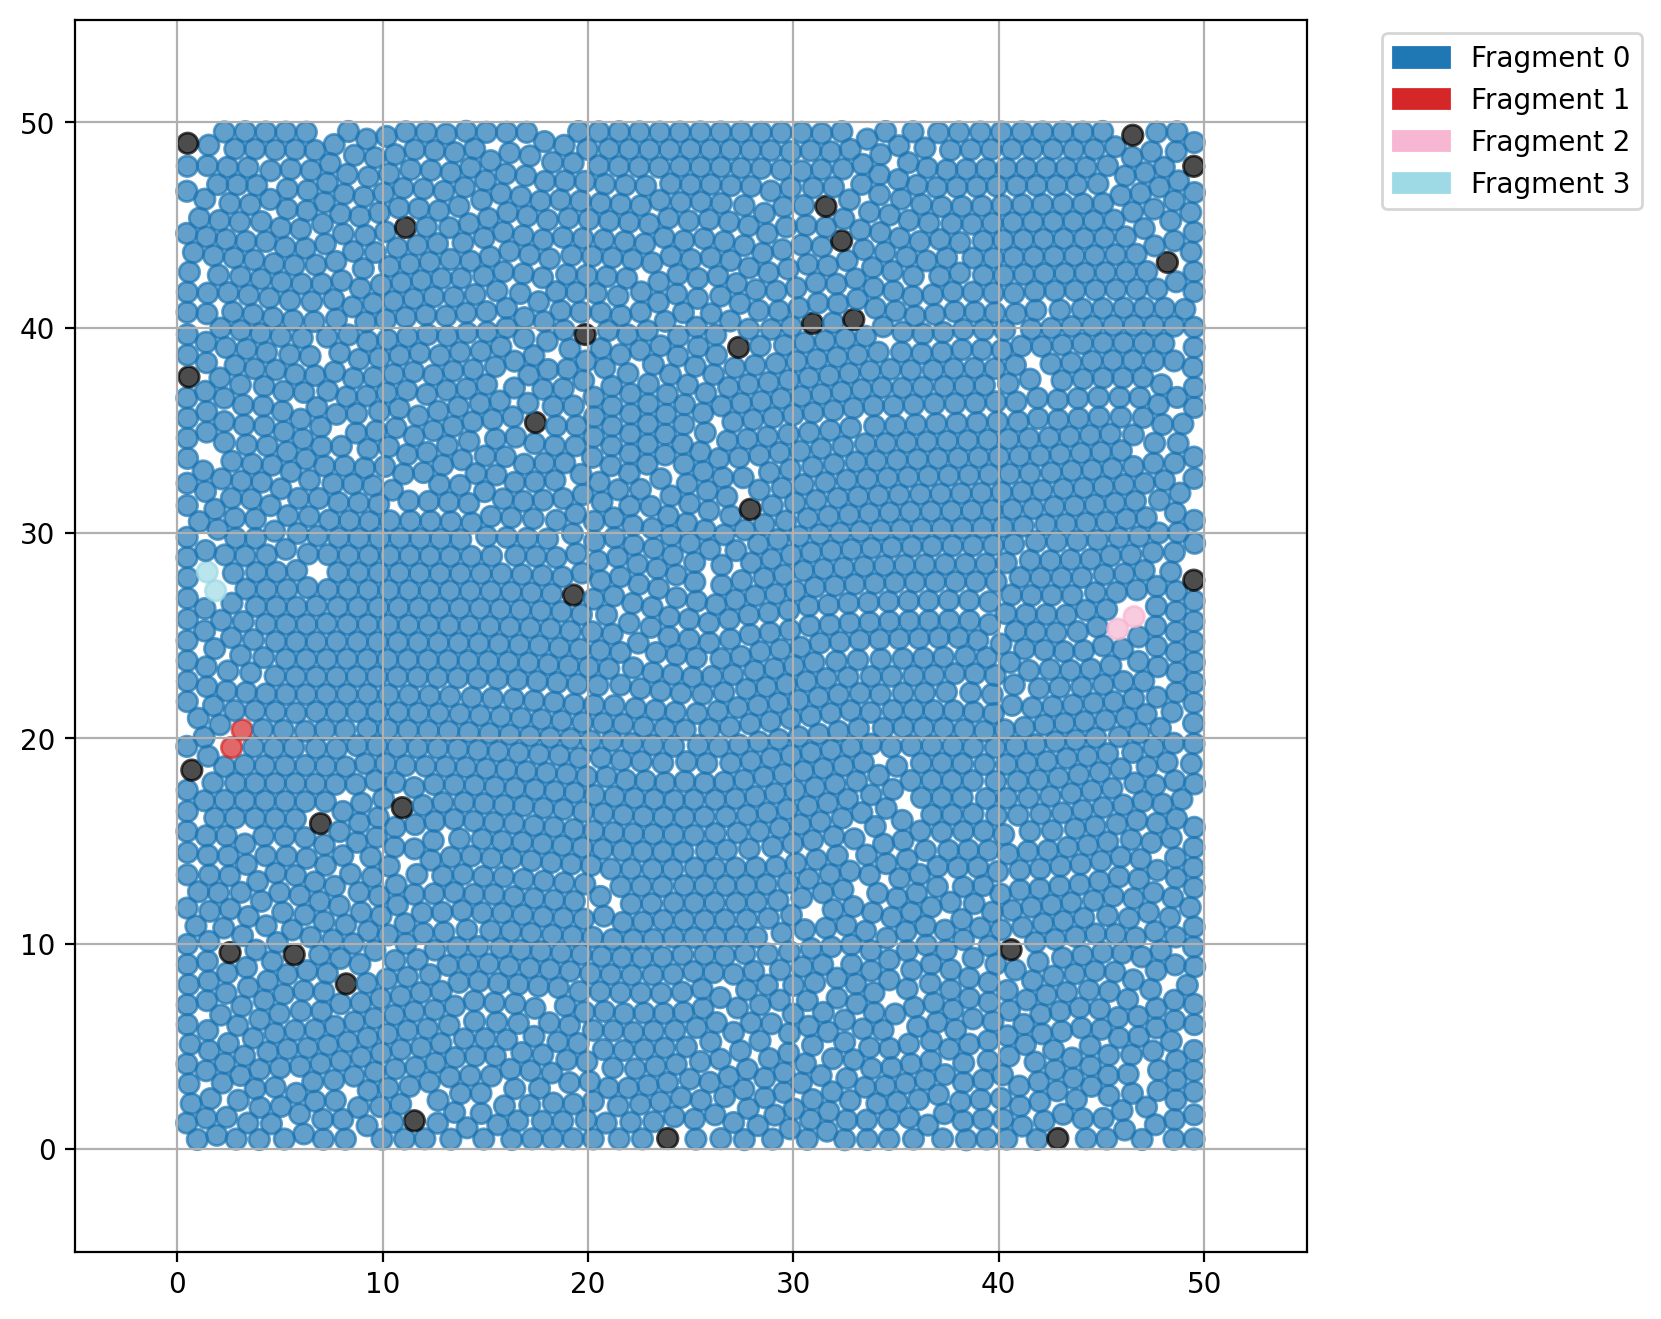

In [11]:
# Get connected components (fragments)
fragments = list(nx.connected_components(Graphs[-1]))

# Map atom IDs to fragment IDs
atom_to_fragment = {}
for fragment_id, fragment in enumerate(fragments):
    for atom_id in fragment:
        atom_to_fragment[atom_id] = fragment_id

# Step 2: Assign unique colors to fragments
num_fragments = len(fragments)
if num_fragments <= 20:
    cmap = cm.get_cmap('tab20', num_fragments)
    colors = [cmap(i) for i in range(num_fragments)]
else:
    colors = cm.rainbow(np.linspace(0, 1, num_fragments))

fragment_colors = {fragment_id: colors[fragment_id] for fragment_id in range(num_fragments)}

# Step 3: Modify plotting code
# Assuming df_atom has already been defined and structured correctly
unique_atoms = set(idx[0] for idx in df_atom.columns)

fig, ax = plt.subplots(figsize=(8, 8))

i = -1  # Use the last timestep
for atom_id in unique_atoms:
    x = df_atom[(atom_id, 'x')].iloc[i]
    y = df_atom[(atom_id, 'y')].iloc[i]
    radius = df_atom[(atom_id, 'radius')].iloc[i]
    circle = Circle((x, y), radius, alpha=0.7)

    # Get the fragment ID for this atom
    fragment_id = atom_to_fragment.get(atom_id, -1)
    if fragment_id == -1:
        # Atom not in any fragment (shouldn't happen)
        color = (0, 0, 0, 1)  # Black color
    else:
        color = fragment_colors[fragment_id]
    
    circle.set_color(color)
    ax.add_patch(circle)

# Set the plot limits manually
ax.set_xlim(-5, 55)
ax.set_ylim(-5, 55)
ax.set_aspect('equal', 'box')
ax.grid()

# Optionally, add a legend
if num_fragments <= 20:
    import matplotlib.patches as mpatches
    handles = []
    for fragment_id in range(num_fragments):
        color = fragment_colors[fragment_id]
        patch = mpatches.Patch(color=color, label=f'Fragment {fragment_id}')
        handles.append(patch)
    ax.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


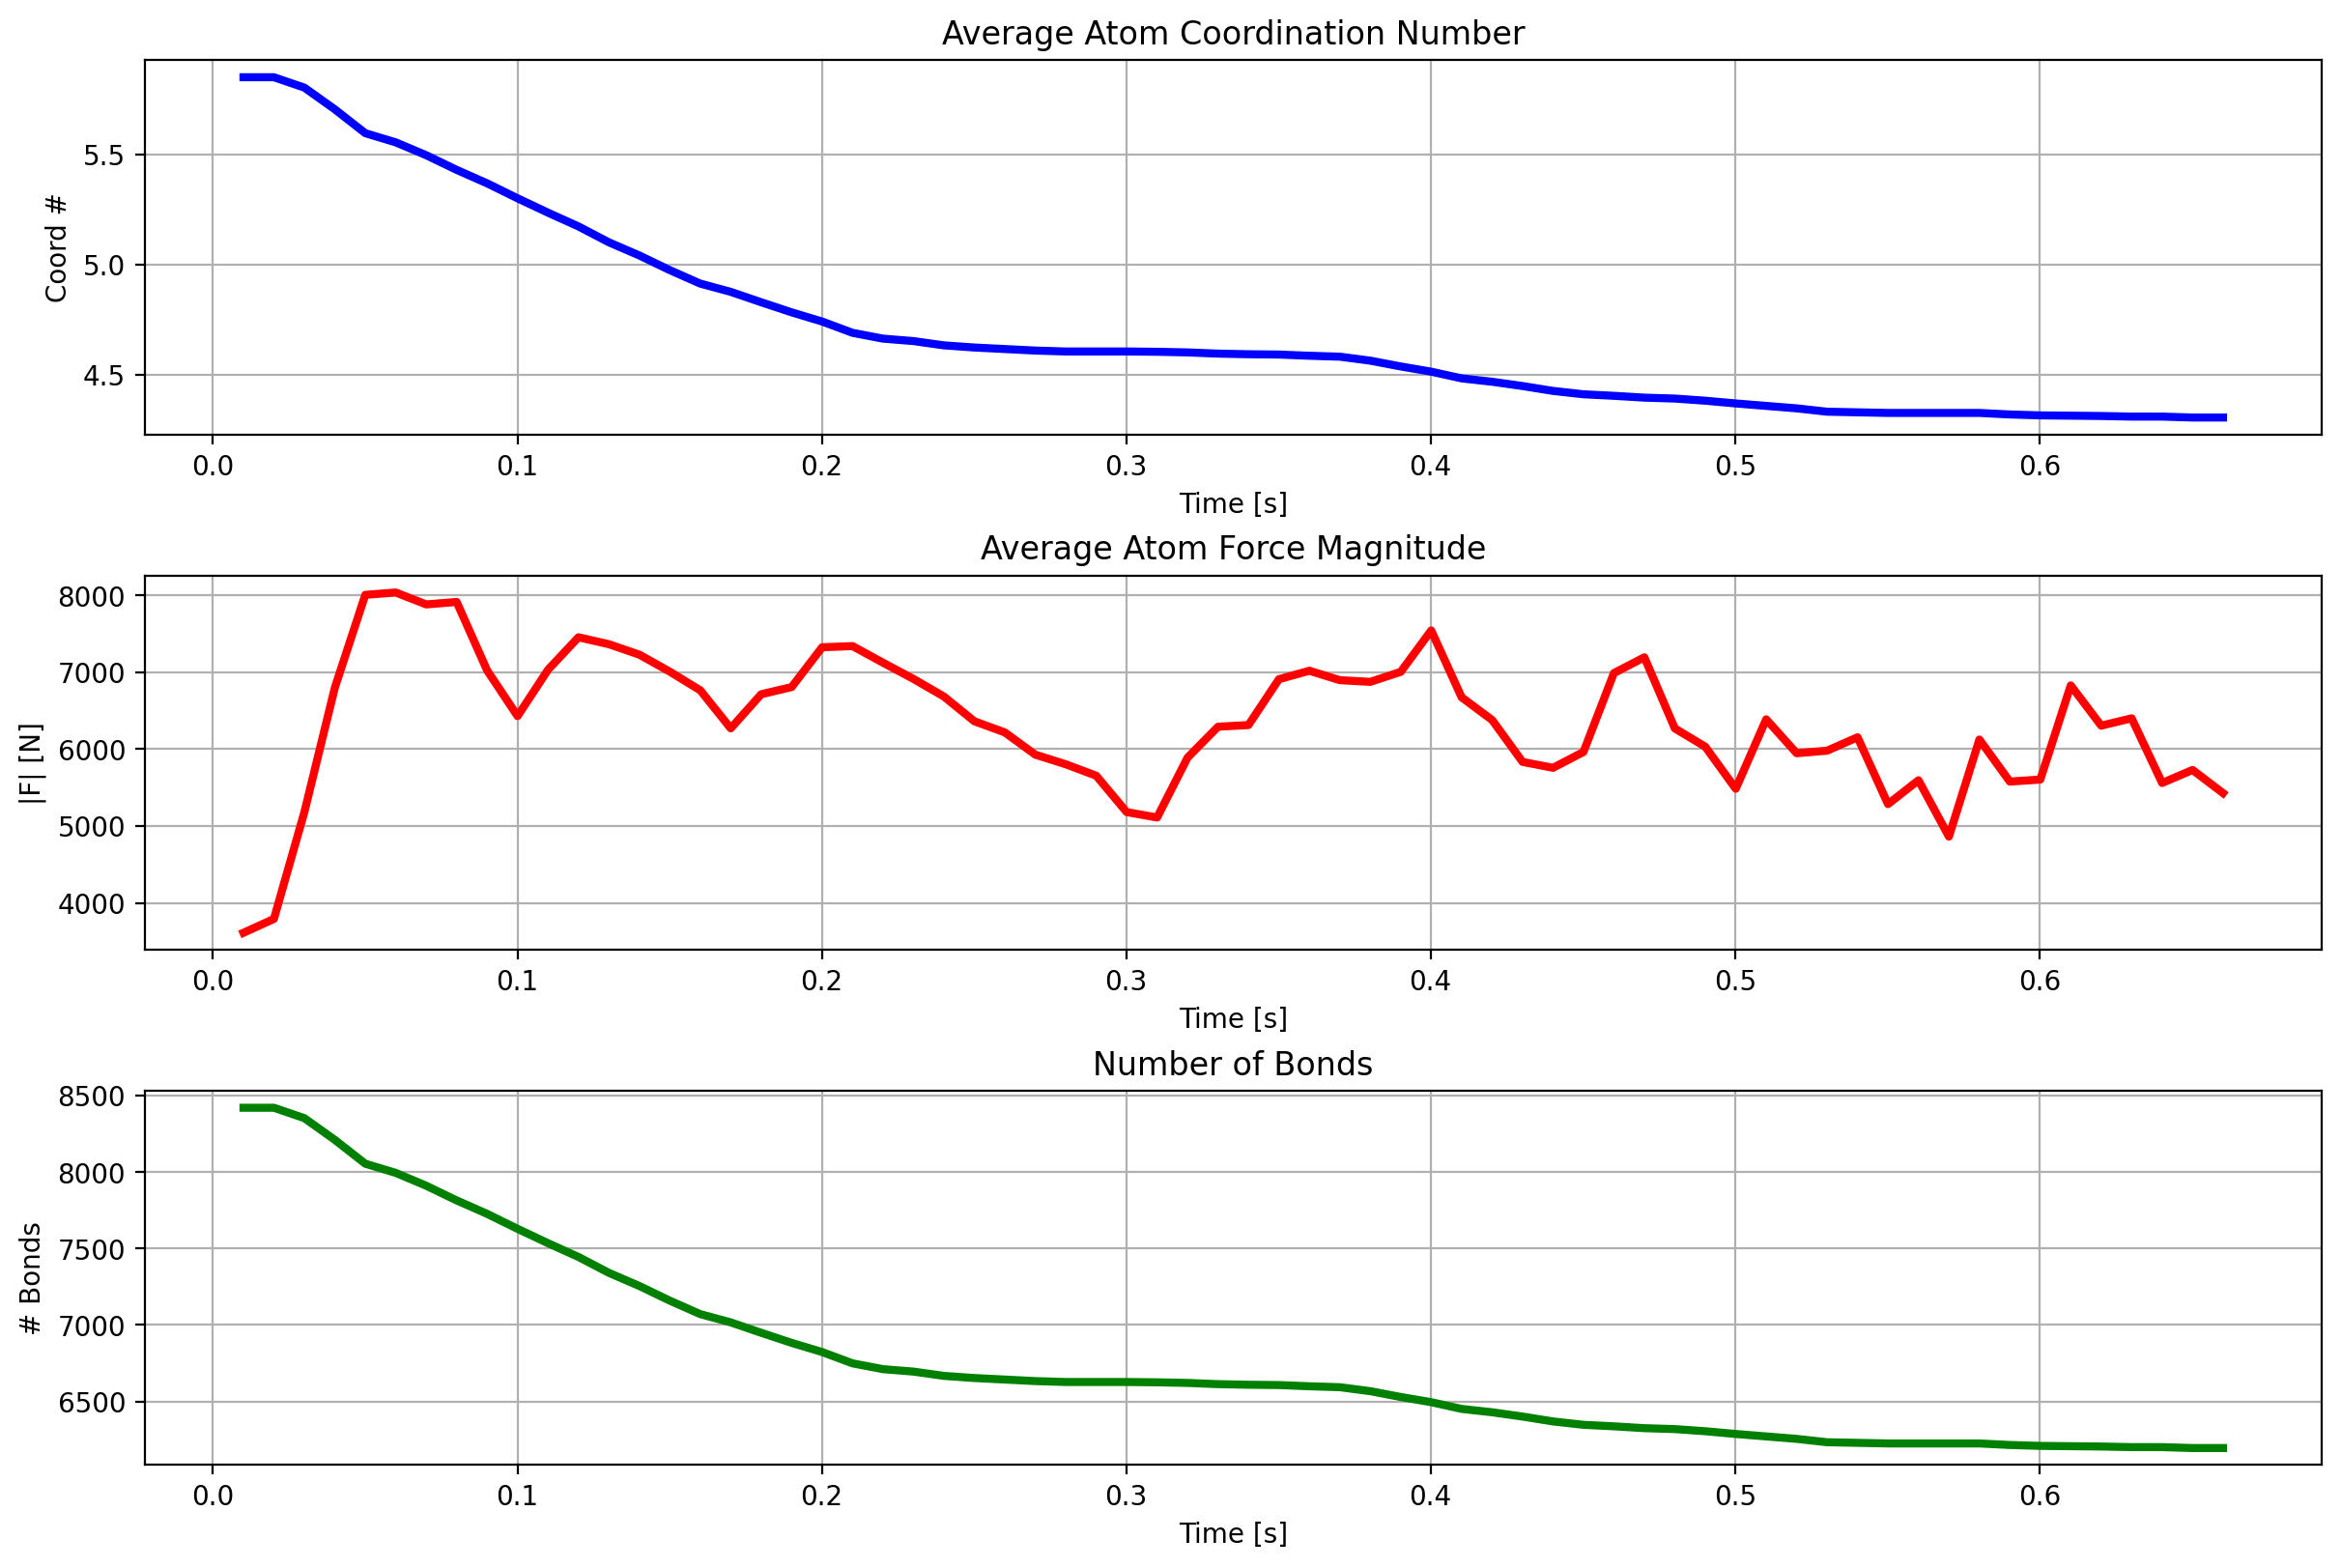

In [11]:
# Calculate the average coordination number at each timestep
fig, ax = plt.subplots(3,1, layout = 'constrained', figsize = (12,8))

plt.sca(ax[0])
data = df_atom.xs('coord_num', axis=1, level=1).mean(axis=1)
plt.plot(data.index, data, lw = 3, color = 'b')
plt.xlabel('Time [s]')
plt.title('Average Atom Coordination Number')
plt.ylabel('Coord #')
plt.grid(True)

plt.sca(ax[1])
data = df_atom.xs('atom_fmag', axis=1, level=1).mean(axis=1)
plt.plot(data.index, data.values, lw = 3, color = 'r')
plt.xlabel('Time [s]')
plt.title('Average Atom Force Magnitude')
plt.ylabel('|F| [N]')
plt.grid(True)

plt.sca(ax[2])
data = df_nbonds['nbonds']
plt.plot(data.index, data.values, lw = 3, color = 'g')
plt.xlabel('Time [s]')
plt.title('Number of Bonds')
plt.ylabel('# Bonds')
plt.grid(True)
plt.show()


MovieWriter Pillow unavailable; using Pillow instead.


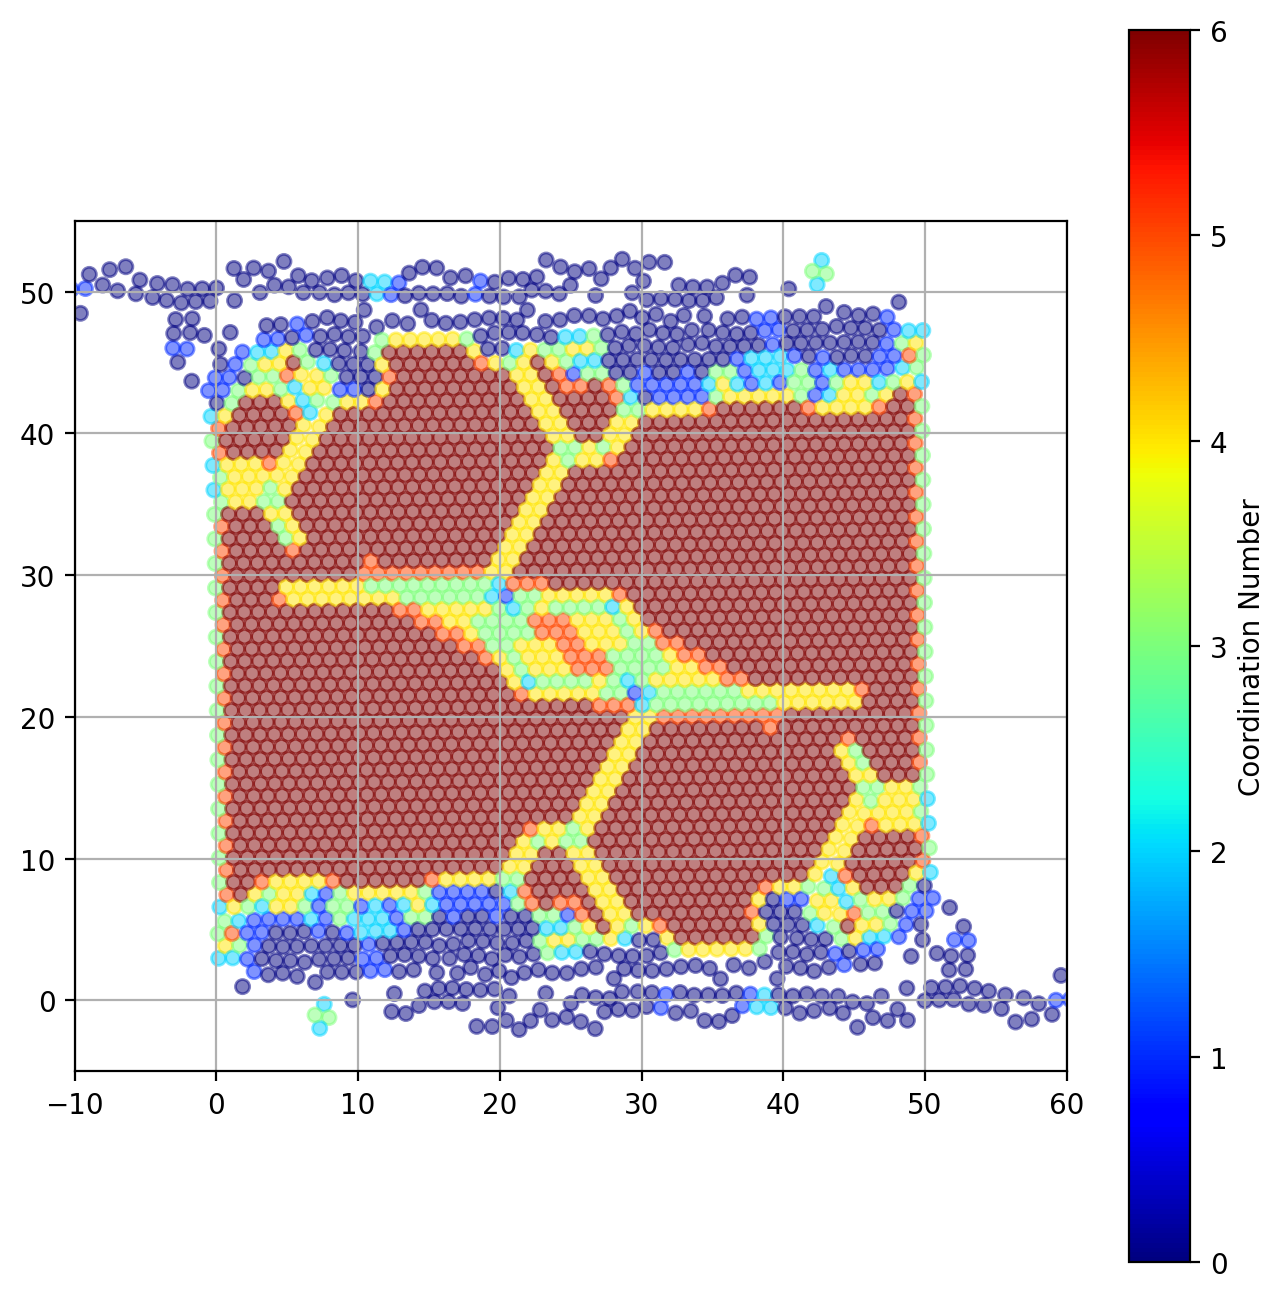

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))

# Dictionary to store circle objects for each atom
circles = {}

# Assuming df_atom has already been defined and structured correctly
unique_atoms = set(idx[0] for idx in df_atom.keys())

# Initialize circles at their initial positions
for atom_id in unique_atoms:
    initial_x = df_atom[(atom_id, 'x')].iloc[0]
    initial_y = df_atom[(atom_id, 'y')].iloc[0]
    radius = df_atom[(atom_id, 'radius')].iloc[0]
    circle = Circle((initial_x, initial_y), radius, color='blue', alpha=0.5)
    ax.add_patch(circle)
    circles[atom_id] = circle

# Set the plot limits manually
ax.set_xlim(-10, 60)
ax.set_ylim(-5, 55)
ax.set_aspect('equal', 'box')
ax.grid()

# Function to map coordination number to a color (e.g., more bonds = redder)
def coord_num_to_color(coord_num, norm, cmap):
    # Normalize the coordination number for color mapping
    normed = norm(coord_num)
    return cmap(normed)

# Get the colormap and normalization for coordination numbers
cmap = cm.jet # You can use other colormaps like 'plasma', 'inferno', etc.
#coord_numbers = df_atom.xs('coord_num', axis=1, level=1).values.flatten()
norm = mcolors.Normalize(vmin=0, vmax=6)

# Create colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set array to empty as it's not needed for a ScalarMappable
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Coordination Number')

# Update function for animation
def update(frame):
    for atom_id in unique_atoms:
        new_x = df_atom[(atom_id, 'x')].iloc[frame]
        new_y = df_atom[(atom_id, 'y')].iloc[frame]
        
        # Get the coordination number for the current atom and frame
        coord_num = df_atom[(atom_id, 'coord_num')].iloc[frame]
        color = coord_num_to_color(coord_num, norm, cmap)  # Get color based on coordination number
        
        circles[atom_id].center = (new_x, new_y)
        circles[atom_id].set_color(color)  # Update the color based on coordination number

    return circles.values()


# Animation parameters
N = 2  # Frame skip value
frame_indices = range(0, len(df_atom[(next(iter(unique_atoms)), 'x')]), N)

# Create and save the animation
anim = FuncAnimation(fig, update, frames=frame_indices, blit=True, repeat=True)
anim.save('gifs/floe_tests/shear/fx5e4_bdamping0.5_1m_balls_3d.gif', writer='Pillow', fps=5)  # Adjust fps as needed

plt.show()

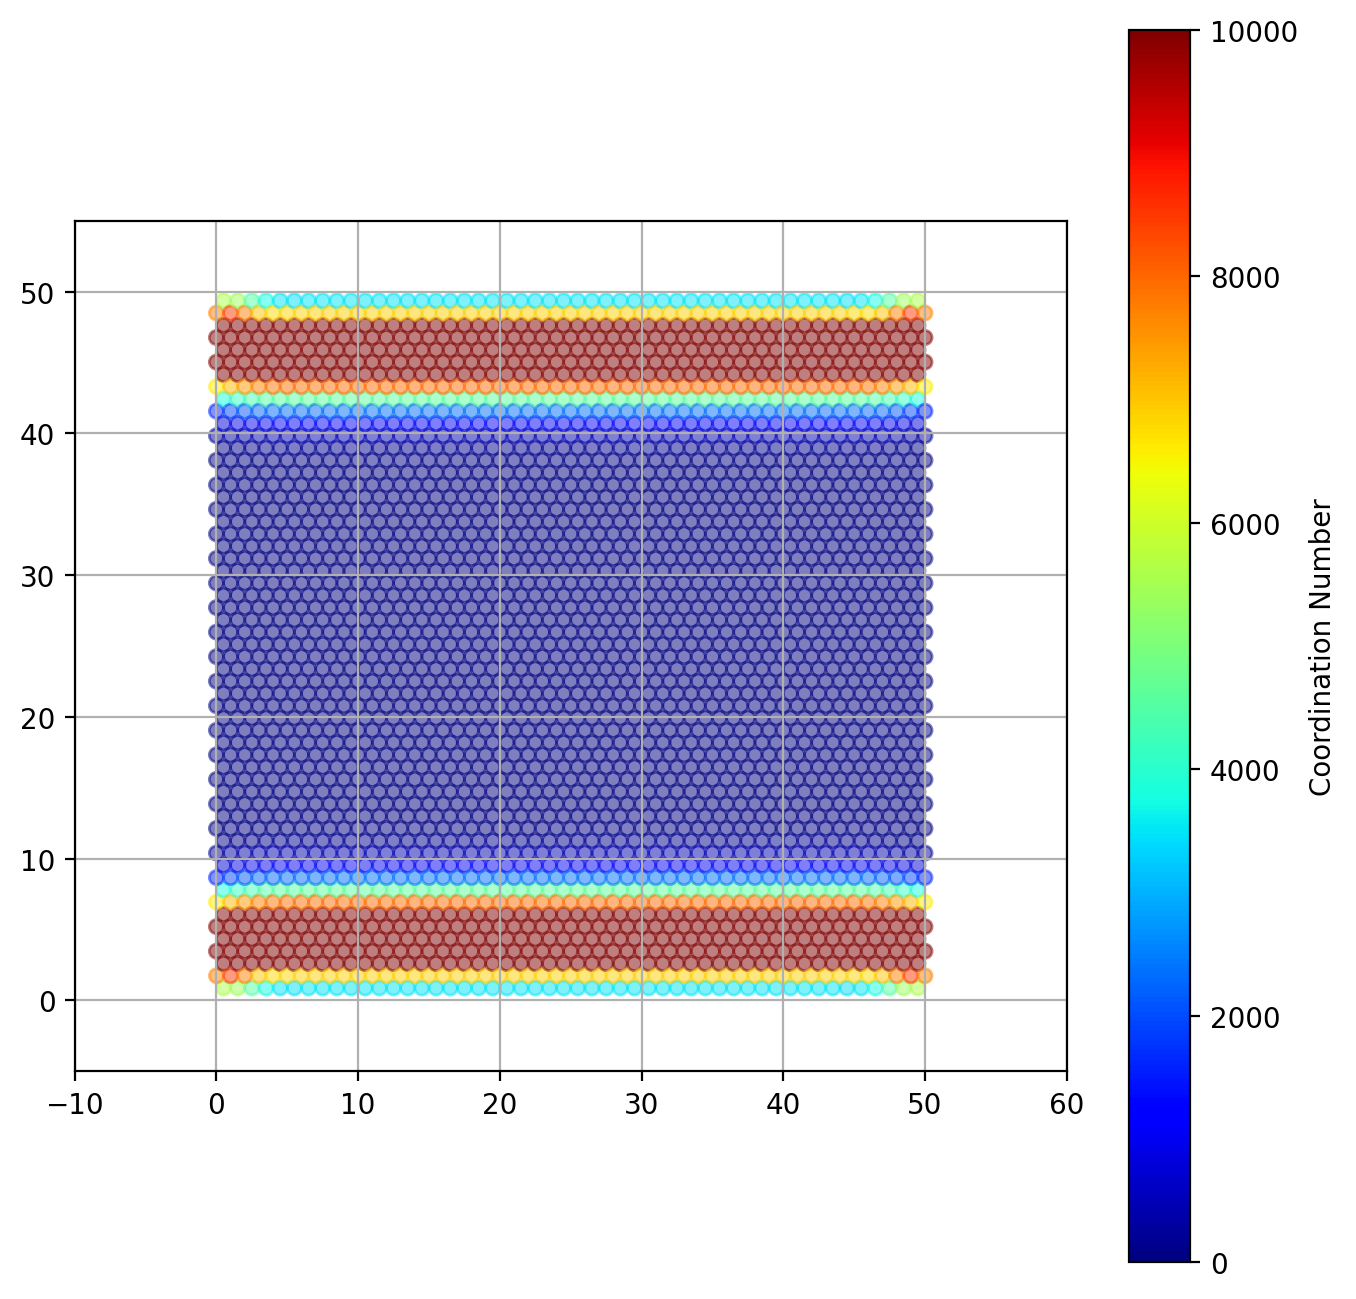

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))

# Dictionary to store circle objects for each atom
circles = {}

# Assuming df_atom has already been defined and structured correctly
unique_atoms = set(idx[0] for idx in df_atom.keys())

# Initialize circles at their initial positions
for atom_id in unique_atoms:
    initial_x = df_atom[(atom_id, 'x')].iloc[0]
    initial_y = df_atom[(atom_id, 'y')].iloc[0]
    radius = df_atom[(atom_id, 'radius')].iloc[0]
    circle = Circle((initial_x, initial_y), radius, color='blue', alpha=0.5)
    ax.add_patch(circle)
    circles[atom_id] = circle

# Set the plot limits manually
ax.set_xlim(-10, 60)
ax.set_ylim(-5, 55)
ax.set_aspect('equal', 'box')
ax.grid()

# Function to map coordination number to a color (e.g., more bonds = redder)
def coord_num_to_color(coord_num, norm, cmap):
    # Normalize the coordination number for color mapping
    normed = norm(coord_num)
    return cmap(normed)

# Get the colormap and normalization for coordination numbers
cmap = cm.jet # You can use other colormaps like 'plasma', 'inferno', etc.
#coord_numbers = df_atom.xs('coord_num', axis=1, level=1).values.flatten()
norm = mcolors.Normalize(vmin=0, vmax=10000)

# Create colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set array to empty as it's not needed for a ScalarMappable
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Coordination Number')

# Update function for animation
def update(frame):
    for atom_id in unique_atoms:
        new_x = df_atom[(atom_id, 'x')].iloc[frame]
        new_y = df_atom[(atom_id, 'y')].iloc[frame]
        
        # Get the coordination number for the current atom and frame
        coord_num = df_atom[(atom_id, 'atom_fmag')].iloc[frame]
        color = coord_num_to_color(coord_num, norm, cmap)  # Get color based on coordination number
        
        circles[atom_id].center = (new_x, new_y)
        circles[atom_id].set_color(color)  # Update the color based on coordination number

    return circles.values()


# Animation parameters
N = 100  # Frame skip value
frame_indices = range(0, len(df_atom[(next(iter(unique_atoms)), 'x')]), N)

# Create and save the animation
anim = FuncAnimation(fig, update, frames=frame_indices, blit=True, repeat=True)

plt.show()